# Part C - Model
---
**Name:**       Ong Zheng Kai  
**Student ID:** p2004048  
**Class:**      DAAA 2A04  
## Links
[Dataset Used](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)  

## Importing
- Importing necessary library
- Importing data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
news_data = pd.read_csv('news_data.csv')

X, y = news_data.drop(columns=['fake']), news_data['fake']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Basic Initialization
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

def pipeline(clf):
    return Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', clf)])

## Modeling Selection
- At this stage, the objectives are to not only find the best models
- We also would want to find the best features so as to not keep redundant features

In [4]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.dummy import DummyClassifier

models = {
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'MultiNB': MultinomialNB(),
    'PassAgr': PassiveAggressiveClassifier(),
    'LogReg': LogisticRegression(),
    'DummyClassifier': DummyClassifier()
}

In [5]:
scores = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1-score': [],
    'time': []
}

trained_models = {}

for model in models.keys():
    results = cross_validate(pipeline(models[model]), x_train['title'], y_train, cv=5, scoring=scoring, n_jobs=-1)

    scores['model'].append(model)

    scores['accuracy'].append(np.mean(results['test_accuracy']))
    scores['precision'].append(np.mean(results['test_precision_weighted']))
    scores['recall'].append(np.mean(results['test_recall_weighted']))
    scores['f1-score'].append(np.mean(results['test_f1_weighted']))
    scores['time'].append(np.mean(results['fit_time'] + results['score_time']))

class_report = pd.DataFrame(scores)
print(display(class_report))

,model,accuracy,precision,recall,f1-score,time
0,SVC,0.961625,0.961823,0.961625,0.961622,322.668832
1,DecisionTree,0.919223,0.919335,0.919223,0.919220,12.055445
2,RandomForest,0.951644,0.952072,0.951644,0.951636,51.537969
3,MultiNB,0.944962,0.945552,0.944962,0.944939,1.259421
4,PassAgr,0.954329,0.954364,0.954329,0.954329,1.348352
5,LogReg,0.953629,0.953907,0.953629,0.953624,2.093549
6,DummyClassifier,0.502116,0.252120,0.502116,0.335687,1.255820


None


[]

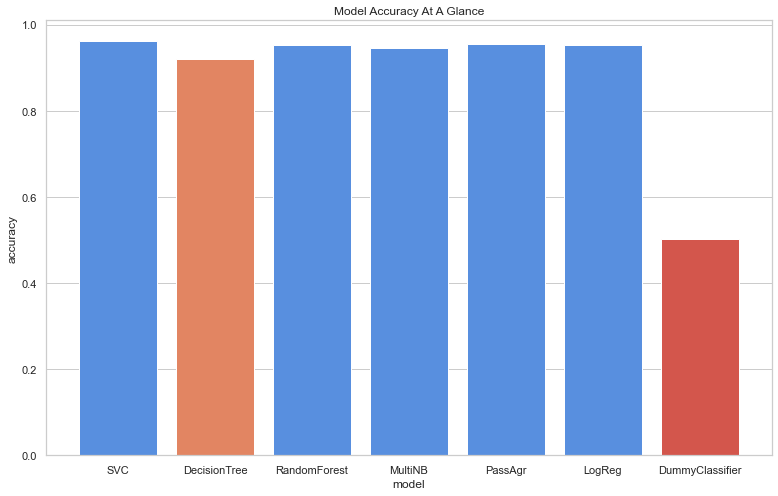

In [6]:
plt.figure(figsize=(13,8))

sb.set_theme(style='whitegrid')

plt.title('Model Accuracy At A Glance')

palette = ['#428bf5', '#f77b4d', '#428bf5', '#428bf5', '#428bf5', '#428bf5', '#ea4335']
sb.barplot(data=class_report, x='model', y='accuracy', palette=palette)

plt.plot()

#### Model Evaluation
---
Testing all models, most models yield satisfactory results. The worst performing model being Decision Tree. However, Decision Tree still vastly outperforms the stupid baseline - Dummy Classifier. All acheive accuracy scores of more than 0.9 which is good. However, any of the models selected still require hyper parameter tuning.   

#### Stupid Baseline Comparison
---
All the models outperforms the Dummy Classifier. As mentioned, even the worst performing model vastly outperforms the Stupid Baseline.

## Model Selection
---
For this project, we'll be using the Passive Aggressive Classifier.   

*Why use a Passive Aggressive Classifier?*   
As all the models have a relatively close accuracy score, we have to start evaluating the models by the speed of the models. We will not be choosing Decision Tree as it has the lowest accuracy score. Although SVC has the highest accuracy, it simply takes far too long to train the model, and hence we are left with Random Forest, Multinomial NB, Passive Aggressive Classifier and Logistic Regression. Passive Aggressive classifier has the second highest accuracy score and moreover, it is faster compared to Random Forest. Hence, Passive Aggressive will be chosen.

## Fine Tuning Model
---
As the Passive Aggressive Classifier does not have an accuracy score of 1.0, we will be hyper tune the model to improve the models accuracy.